In [1]:
% load_ext rpy2.ipython

In [2]:
%%R
#ip <- installed.packages() 
#pkgs.to.remove <- ip[!(ip[,"Priority"] %in% c("base", "recommended")), 1]
#sapply(pkgs.to.remove, remove.packages)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


NULL


In [3]:
%%R
#source("http://bioconductor.org/biocLite.R")

NULL


In [4]:
%%R
#biocLite("phyloseq")

NULL


In [5]:
%%R
#source("http://bioconductor.org/biocLite.R")
#biocLite("phyloseq")

NULL


In [6]:
%%R
library("phyloseq")
library(ggplot2)

In [7]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", "../../SeqData/trees/fulltree.tre", parseFunction = parse_taxonomy_greengenes)
physeq = prune_samples((sample_data(physeq)$Buff==0|sample_data(physeq)$Trtmt=="H"),physeq)

In [8]:
%%R
physeq.PCR <- subset_samples(physeq,(MyID==67|MyID==68|MyID==69|MyID==70|MyID==71|MyID==72|MyID==73|MyID==74|MyID==75|MyID==76|MyID==77))
#Making physeq with only the PCR replicated data

In [9]:
%%R
ps <- physeq.PCR

In [10]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(ps, function(x) x / sum(x))

In [11]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.NMDS.full = ordinate(ps_snorm, method = "PCoA", distance = "unifrac", weighted=TRUE)
NMDS.full = plot_ordination(ps_snorm, ord.NMDS.full, axes = c(1,2), justDF = TRUE)
NMDS.full$Samples = rownames(NMDS.full)

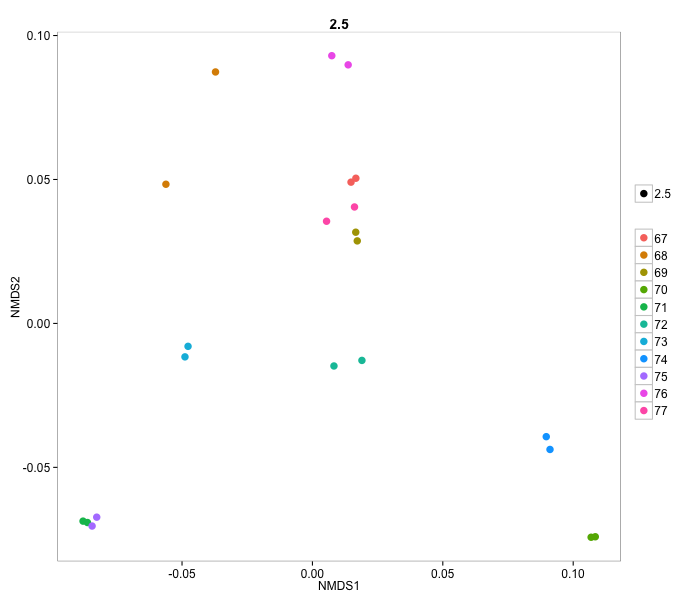

In [12]:
%%R -h 600 -w 700
D <- NMDS.full
# Sets the relevant ordination

#D$Trtmt <- as.factor(D$Trtmt)
#levels(D$Trtmt) <- c("Ferrihydrite", "Heavy Fraction", "Kaolinite", "Quartz", "Soil")

colnames(D)[1:2]<-c("NMDS1","NMDS2")
# Renames the axis columns

#D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
#D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
#D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = MyID, shape = Month))

# Determines the size of the symbols
p = p  + geom_point(size=3.5)

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),axis.text = element_text(size=12),legend.text = element_text(size=12),
          strip.background = element_rect(colour="white", fill="white"))

# Displays the plot object
p = p + facet_wrap(~Month, scales="free")
# The axis scales could be all optimized individually
# p = p + facet_grid(~Month)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days
#plot.full.byDay = p
p

Samples clearly come out very close to each other no matter which one is used.  
Only 68 is perhaps suspect.  
I will use collapsereplicates command in DESeq.